Ground State Energy: -13.61+0.00j eV
1st Excited State Energy: -3.40+0.00j eV
2nd Excited State Energy: -1.29+0.00j eV


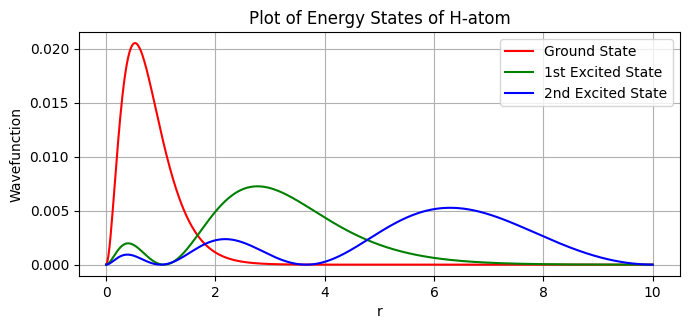

In [2]:
import numpy as np
from scipy.sparse.linalg import eigs
import matplotlib.pyplot as plt

# Practicle Const. values
h = 1973
m = 0.511e6
e = 3.795
rmin = 10e-10
rmax = 10
n = 500
r = np.linspace(rmin, rmax, n)
d = r[1] - r[0]

V = np.zeros((n, n))
for i in range(n):
    V[i, i] = -(e**2)/r[i]

K = np.zeros((n, n))
np.fill_diagonal(K, -2)  # Main diagonal with -2
np.fill_diagonal(K[1:], 1)  # Upper diagonal (offset by +1) with 1
np.fill_diagonal(K[:, 1:], 1)  # Lower diagonal (offset by +1) with 1


H = -(h**2 / (2 * m * d**2)) * K + V
eigenvalues, eigenvectors = eigs(H, k=4, which='SR')

print(f'Ground State Energy: {eigenvalues[1]:.2f} eV')
print(f'1st Excited State Energy: {eigenvalues[2]:.2f} eV')
print(f'2nd Excited State Energy: {eigenvalues[3]:.2f} eV')

plt.figure(figsize=(7, 9))

plt.subplot(3, 1, 1)
plt.plot(r, np.abs(eigenvectors[:, 1])**2, "r", label='Ground State')
plt.plot(r, np.abs(eigenvectors[:, 2])**2, "g", label='1st Excited State')
plt.plot(r, np.abs(eigenvectors[:, 3])**2, "b", label='2nd Excited State')
plt.title("Plot of Energy States of H-atom")
plt.xlabel('r')
plt.ylabel('Wavefunction')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()